In [1]:
from tools_PythonTracks_Read_F8 import read_F8
import matplotlib.pyplot as plt
import seaborn as sns
from amuse.units import units, constants
import numpy as np

sns.set(font_scale=1.66, rc={"lines.linewidth": 3.5, "text.usetex" : True})
sns.set_style("ticks")

In [2]:
F8_file = "../../tracks/ROT_0.00_Z0.002_Y0.252/Z0.002Y0.252O_IN0.00OUTA1.74_F81_M30.0"

F8_str, F8_str_info, F8_track_info = read_F8(F8_file)

cm_to_rsun = (1 | units.cm).value_in(units.RSun)

../../tracks/ROT_0.00_Z0.002_Y0.252/Z0.002Y0.252O_IN0.00OUTA1.74_F81_M30.0
cols_names ['M', 'R', 'T', 'P', 'RHO', 'PSI', 'KAP', 'H_P', 'V_MLT', 'PT', 'LTOT', 'L_CONV', 'E_NUC', 'E_GRAV', 'E_NEUT', 'E_ACC', 'EGTC', 'EITC', 'EHTC', 'ESTC', 'SPE_S', 'GRA_RAD', 'GRA_AD', 'GRA_MLT', 'MU', 'CP', 'CV', 'GAM1', 'GAM3', 'CHIT', 'CHIRHO', 'XH', 'XHE', 'XC', 'XN', 'XO', 'XNE', 'XNA', 'XMG', 'XAL', 'XSI', 'XS32']
finish 2190


In [3]:
# F8_str_info
# GMS_0 è la massa
# usa solo F8, no F81

# XH - abbondanza idrogeno
# esterno ----> interno

In [4]:
F8_track_info
F8_str[0].dtype

#F8_str[15]["R"]
#F8_str[150]["RHO"]




dtype([('M', '<f8'), ('R', '<f8'), ('T', '<f8'), ('P', '<f8'), ('RHO', '<f8'), ('PSI', '<f8'), ('KAP', '<f8'), ('H_P', '<f8'), ('V_MLT', '<f8'), ('PT', '<f8'), ('LTOT', '<f8'), ('L_CONV', '<f8'), ('E_NUC', '<f8'), ('E_GRAV', '<f8'), ('E_NEUT', '<f8'), ('E_ACC', '<f8'), ('EGTC', '<f8'), ('EITC', '<f8'), ('EHTC', '<f8'), ('ESTC', '<f8'), ('SPE_S', '<f8'), ('GRA_RAD', '<f8'), ('GRA_AD', '<f8'), ('GRA_MLT', '<f8'), ('MU', '<f8'), ('CP', '<f8'), ('CV', '<f8'), ('GAM1', '<f8'), ('GAM3', '<f8'), ('CHIT', '<f8'), ('CHIRHO', '<f8'), ('XH', '<f8'), ('XHE', '<f8'), ('XC', '<f8'), ('XN', '<f8'), ('XO', '<f8'), ('XNE', '<f8'), ('XNA', '<f8'), ('XMG', '<f8'), ('XAL', '<f8'), ('XSI', '<f8'), ('XS32', '<f8')])

In [5]:
ntimes = len(F8_str_info)

it = 0
central_H = F8_str[it]["XH"][-1]
time = F8_str_info[it]["Age"]
print(central_H, time)

XHcen, XHecen, XCcen, XNcen, XOcen, Rad, times = np.zeros((7,ntimes))
RhoRad = []

for it in range(ntimes):
    XHcen[it]= F8_str[it]["XH"][-1]
    XHecen[it] = F8_str[it]["XHE"][-1]
    XCcen[it] = F8_str[it]["XC"][-1]
    XNcen[it] = F8_str[it]["XN"][-1]
    XOcen[it] = F8_str[it]["XO"][-1]


    times[it] = F8_str_info[it]["Age"]*1e-6
    Rad[it] = F8_str[it]["R"][0]*cm_to_rsun

    rads = F8_str[it]["R"]*cm_to_rsun
    rhos = F8_str[it]["RHO"]
    RhoRad.append([rhos, rads])

picktimes = np.array([1, 2, 3, 4, 5, 6, 6.3, 6.4, 6.5, 6.6, 6.65])
pickidx = []
for pt in picktimes:
    pickidx.append(np.where(times>pt)[0][0])
    
# GET INDEX OF GIANT PHASE
noXH = np.where(XHcen<1e-15)[0][0]
beginCHeB = np.where((XHcen<1e-15) & (XHecen<1-1e-2))[0][0]

print(noXH, beginCHeB)

0.7459576516 0.1
1114 1149


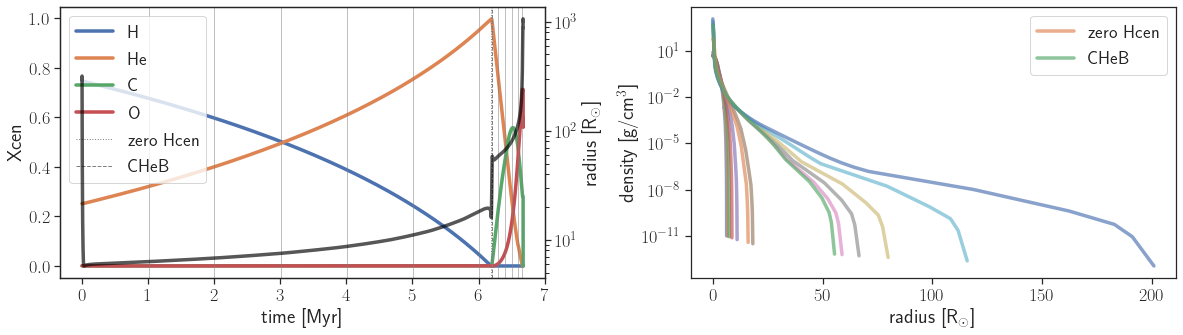

In [9]:
f1, ax = plt.subplots(1,2, figsize=(20, 5), squeeze=False)

ax[0,0].plot(times, XHcen, label="H")
ax[0,0].plot(times, XHecen, label="He")
ax[0,0].plot(times, XCcen, label="C")
#ax[0,0].plot(times, XNcen, label="N")
ax[0,0].plot(times, XOcen, label="O")

ax[0,0].axvline(times[noXH], c="grey", lw=1, ls=":", label="zero Hcen")
ax[0,0].axvline(times[beginCHeB], c="grey", lw=1, ls="--", label="CHeB")

#ax[0,0].set_xlim(left=times[noXH-100], right=times[noXH+60])
for it in pickidx:
    ax[0,0].axvline(times[it], c="grey", lw=1, ls="-", alpha=.5)


ax[0,0].legend()
ax[0,0].set_xlabel("time [Myr]")
ax[0,0].set_ylabel("Xcen")

ax0t = ax[0,0].twinx()
ax0t.plot(times, Rad, c="black", alpha=.66)
ax0t.set_ylabel("radius [R$_\odot$]")
ax0t.set_yscale("log")

for it in pickidx:
    rr = RhoRad[it]
    ax[0,1].plot(rr[1], rr[0], alpha=.66)

ax[0,1].plot(RhoRad[noXH][1], RhoRad[noXH][0], alpha=.66, label="zero Hcen")
ax[0,1].plot(RhoRad[beginCHeB][1], RhoRad[beginCHeB][0], alpha=.66, label="CHeB")

ax[0,1].legend()
ax[0,1].set_yscale("log")
#ax[0,1].set_xscale("log")
ax[0,1].set_xlabel("radius [R$_\odot$]")
ax[0,1].set_ylabel("density [g/cm$^3$]")

f1.subplots_adjust(wspace=0.3)

plt.show()